CSCI-P556: Applied Machine Learning
Fall 2019
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: 
* As shown below, train_1 and valid_1 is a smaller subset of train_2 and valid_2 superset.
* They have a combined size of 44,630 rows out of which there are 36,168 rows unique; This seems to be constituted by train_2 and valid_2. 
* train_1.csv and valid_1.csv, train_2.csv and valid_2.csv both seem to be split into a train/valid with 80:20 ratio
* There is also a class imbalance between the to sets [train1, valid1] and [train_2 and valid_2].
    - The latter is skewed towrds predicting y = 0
    - the former is more or less uniform
    

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
train_1 = pd.read_csv(r'C:\Users\sriha\Documents\Indiana Fall 2019\Applied ML\Assignments\A2\train_1.csv')
valid_1 = pd.read_csv(r'C:\Users\sriha\Documents\Indiana Fall 2019\Applied ML\Assignments\A2\valid_1.csv')

train_2 = pd.read_csv(r'C:\Users\sriha\Documents\Indiana Fall 2019\Applied ML\Assignments\A2\train_2.csv')
valid_2 = pd.read_csv(r'C:\Users\sriha\Documents\Indiana Fall 2019\Applied ML\Assignments\A2\valid_2.csv')
test = pd.read_csv(r'C:\Users\sriha\Documents\Indiana Fall 2019\Applied ML\Assignments\A2\test.csv')

In [3]:
#Combining train_2 and valid_2 into one dataframe
df_set2_all = train_2.append(valid_2)
print("Number of rows from train_2 and valid_2:",df_set2_all.drop_duplicates().shape[0])

#Combining train_2,valid_2 with train_1 and valid_1
df_set2_all = train_2.append(valid_2).append(train_1).append(valid_2)
print("Number of rows from train_2 + valid_2 and train_1 + valid_1:",df_set2_all.drop_duplicates().shape[0])

print("\ntrain_1 and valid_1 adds nothing new to train_2 and valid_2")

Number of rows from train_2 and valid_2: 36168
Number of rows from train_2 + valid_2 and train_1 + valid_1: 36168

train_1 and valid_1 adds nothing new to train_2 and valid_2


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the following steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Answer for bullet one
    
    Continuous features
    - Age
    - Day
    - Balance
    - Duration
    - Campaign
    - pdays
    - previous
    
2.   Answer for bullet two

    Categorical features
    - Job
    - Marital
    - Education
    - Default
    - Housing
    - Loan
    - Contact
    - Month
    - poutcome
    - y
    
3.   Answer for bullet three
    - All occurrances of -1 in pdays have been made 0
    - Since the unknowns themselves form a category, they have not been removed from the datasets

In [4]:
def categorical_pipeline(df):
    df['y'] = np.where(df['y']== 'yes',np.int(1),np.int(0))
    df['default'] = np.where(df['default']== 'yes',np.int(1),np.int(0))
    df['housing'] = np.where(df['housing']== 'yes',np.int(1),np.int(0))
    df['loan'] = np.where(df['loan']== 'yes',np.int(1),np.int(0))
    df['pdays'] = np.where(df['pdays']== -1 ,np.int(0),df['pdays'])
    return df

def normalize(df,col):
    #Normalize age
    X_norm = df[col]
    mu = np.mean(X_norm) #Compute Mean
    sigma = np.std(X_norm,ddof=1) #Compute Standard Deviation
    #Perform Normalization
    X_norm = (X_norm - mu)/sigma
    df[col] = X_norm
    return df    
    
def numerical_pipeline(df):
    df = pd.get_dummies(df, columns = ['job'] , prefix = ['job'])
    df = pd.get_dummies(df, columns = ['marital'] , prefix = ['marital'])
    df = pd.get_dummies(df, columns = ['education'] , prefix = ['edu'])
    df = pd.get_dummies(df, columns = ['contact'] , prefix = ['cont'])
    df = pd.get_dummies(df, columns = ['poutcome'] , prefix = ['poutcome'])
    df = pd.get_dummies(df, prefix = ['month'] , columns = ['month'])
    
    df = normalize(df,'age')
    df = normalize(df,'day')
    df = normalize(df,'duration')
    df = normalize(df,'campaign')
    df = normalize(df,'pdays')
    df = normalize(df,'previous')
    return df

In [5]:
train_1 = categorical_pipeline(train_1)
valid_1 = categorical_pipeline(valid_1)
train_2 = categorical_pipeline(train_2)
valid_2 = categorical_pipeline(valid_2)
test = categorical_pipeline(test)

In [6]:
train_1 = numerical_pipeline(train_1)
train_2 = numerical_pipeline(train_2)
valid_1 = numerical_pipeline(valid_1)
valid_2 = numerical_pipeline(valid_2)
test = numerical_pipeline(test)

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

In [7]:
# PROBLEM 1, TASK 2 CODE GOES HERE

Optimal Lambda:  0.1
Train Accuracy at Optimal Lambda: 0.831
Test Accuracy at Optimal Lambda: 0.761
Validation Accuracy at Optimal Lambda: 0.817


Text(0,0.5,'Accuracy')

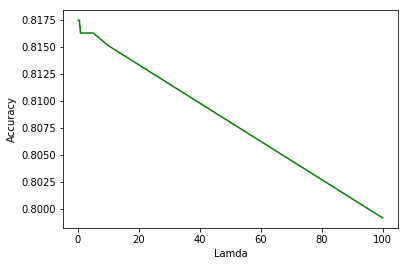

In [11]:
C_param_range = [0.1 ,0.2,0.3,0.5,0.6,0.7,0.8,0.9, 1,5,10,100] #np.linspace(0.00001,10,10)
inv_C_params = [1/i for i in C_param_range]


Accuracy_table = pd.DataFrame(columns = ['C_parameter','Valid_Accuracy','Test_Accuracy','Train_Accuracy'])
Accuracy_table['C_parameter'] = C_param_range

x_train = train_1[train_1.columns.difference(['y'])]
y_train = train_1['y']

x_valid = valid_1[valid_1.columns.difference(['y'])]
y_valid = valid_1['y']

x_test = test[test.columns.difference(['y'])]
y_test = test['y']

j = 0
for i in inv_C_params:
    logisticRegr = LogisticRegression(penalty='l2',C = i, random_state = 0)
    logisticRegr.fit(x_train, y_train)
    
    # Saving accuracy score in table
    Accuracy_table.iloc[j,1] = logisticRegr.score(x_valid, y_valid)
    Accuracy_table.iloc[j,2] = logisticRegr.score(x_test, y_test)
    Accuracy_table.iloc[j,3] = logisticRegr.score(x_train, y_train)
    j += 1

Test_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Test_Accuracy
Train_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Train_Accuracy
Valid_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Valid_Accuracy
optimal_C = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).C_parameter

print("Optimal Lambda: ",optimal_C)
print("Train Accuracy at Optimal Lambda:",np.round(Train_accuracy,3))
print("Test Accuracy at Optimal Lambda:",np.round(Test_accuracy,3))
print("Validation Accuracy at Optimal Lambda:",np.round(Valid_accuracy,3))
plt.plot(Accuracy_table['C_parameter'],Accuracy_table['Valid_Accuracy'],color = 'green',label = "Validation Accuracy")  
plt.xlabel("Lamda")
plt.ylabel("Accuracy")

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

Optimal Lambda:  0.7
Train Accuracy at Optimal Lambda: 0.902
Test Accuracy at Optimal Lambda: 0.901
Validation Accuracy at Optimal Lambda: 0.901


Text(0,0.5,'Accuracy')

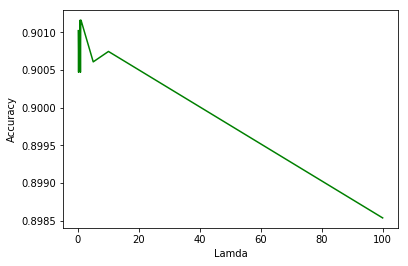

In [12]:
C_param_range = [0.1 ,0.2,0.3,0.5,0.6,0.7,0.8,0.9, 1,5,10,100] 
inv_C_params = [1/i for i in C_param_range]


Accuracy_table = pd.DataFrame(columns = ['C_parameter','Valid_Accuracy','Test_Accuracy','Train_Accuracy'])
Accuracy_table['C_parameter'] = C_param_range

x_train = train_2[train_2.columns.difference(['y'])]
y_train = train_2['y']

x_valid = valid_2[valid_2.columns.difference(['y'])]
y_valid = valid_2['y']

x_test = test[test.columns.difference(['y'])]
y_test = test['y']

j = 0
for i in inv_C_params:
    logisticRegr = LogisticRegression(penalty='l2',C = i, random_state = 0)
    logisticRegr.fit(x_train, y_train)
    
    # Saving accuracy score in table
    Accuracy_table.iloc[j,1] = logisticRegr.score(x_valid, y_valid)
    Accuracy_table.iloc[j,2] = logisticRegr.score(x_test, y_test)
    Accuracy_table.iloc[j,3] = logisticRegr.score(x_train, y_train)
    j += 1

Test_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Test_Accuracy
Train_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Train_Accuracy
Valid_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Valid_Accuracy
optimal_C = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).C_parameter

print("Optimal Lambda: ",optimal_C)
print("Train Accuracy at Optimal Lambda:",np.round(Train_accuracy,3))
print("Test Accuracy at Optimal Lambda:",np.round(Test_accuracy,3))
print("Validation Accuracy at Optimal Lambda:",np.round(Valid_accuracy,3))
plt.plot(Accuracy_table['C_parameter'],Accuracy_table['Valid_Accuracy'],color = 'green',label = "Validation Accuracy")  
plt.xlabel("Lamda")
plt.ylabel("Accuracy")

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

C_param_range = [0.1 ,0.2,0.3,1,10,100,500,1000] # smaller the value more the regularisation
inv_C_params = [1/i for i in C_param_range]

thresh_range = np.array([0.17,0.91,0.40,0.59,0.77,0.23])

Accuracy_table = pd.DataFrame()

In [33]:
x_train = train_2[train_2.columns.difference(['y'])]
y_train = train_2['y']

x_valid = valid_2[valid_2.columns.difference(['y'])]
y_valid = valid_2['y']

x_test = test[test.columns.difference(['y'])]
y_test = test['y']


for lamb in inv_C_params:
    logisticRegr = LogisticRegression(penalty='l2',C = lamb)
    for t in thresh_range:
        logisticRegr.fit(x_train,y_train)
        
        y_train_pred = logisticRegr.predict_proba(x_train)[:,1] >= t
        y_train_pred = y_train_pred.astype(int)
        train_acc = accuracy_score(y_train,y_train_pred)
        
        y_test_pred = logisticRegr.predict_proba(x_test)[:,1] >= t
        y_test_pred = y_test_pred.astype(int)
        test_acc = accuracy_score(y_test,y_test_pred)
        
        y_valid_pred = logisticRegr.predict_proba(x_valid)[:,1] >= t
        y_valid_pred = y_valid_pred.astype(int)
        valid_acc = accuracy_score(y_valid,y_valid_pred)
        
        Accuracy_table = Accuracy_table.append({'Lambda': lamb, 
                                                'Theta' : t,
                                                'Train_Accuracy' : train_acc,
                                                'Test_Accuracy' : test_acc,
                                                'Valid_Accuracy' : valid_acc}, 
                                               ignore_index=True)    
print('The accuracies across lambda x Theta -')
Accuracy_table

The accuracies across lambda x Theta -


,Lambda,Test_Accuracy,Theta,Train_Accuracy,Valid_Accuracy
0,10.000000,0.872940,0.17,0.872157,0.877385
1,10.000000,0.886542,0.91,0.887848,0.886646
2,10.000000,0.903904,0.40,0.903159,0.902820
3,10.000000,0.898706,0.59,0.900670,0.898811
4,10.000000,0.892845,0.77,0.894968,0.894111
5,10.000000,0.891408,0.23,0.889507,0.893696
6,5.000000,0.874710,0.17,0.873851,0.877661
7,5.000000,0.886100,0.91,0.887779,0.886785
8,5.000000,0.904788,0.40,0.903574,0.903373
9,5.000000,0.899480,0.59,0.900394,0.898949


Optimal Inverse Lambda:  0.2
Optimal Theta:  0.4
Train Accuracy at Optimal Lambda: 0.904
Test Accuracy at Optimal Lambda: 0.905
Validation Accuracy at Optimal Lambda: 0.903


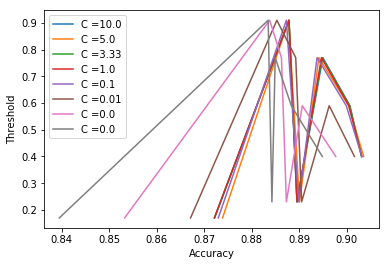

In [34]:
Test_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Test_Accuracy
Train_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Train_Accuracy
Valid_accuracy = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Valid_Accuracy
optimal_C = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Lambda
optimal_theta = np.min(Accuracy_table[Accuracy_table['Valid_Accuracy'] == np.max(Accuracy_table['Valid_Accuracy'])]).Theta

print("Optimal Inverse Lambda: ",1/optimal_C)
print("Optimal Theta: ",optimal_theta)  
print("Train Accuracy at Optimal Lambda:",np.round(Train_accuracy,3))
print("Test Accuracy at Optimal Lambda:",np.round(Test_accuracy,3))
print("Validation Accuracy at Optimal Lambda:",np.round(Valid_accuracy,3))

for i in inv_C_params:
    acc = Accuracy_table[Accuracy_table['Lambda'] == i].sort_values(by = 'Train_Accuracy')['Train_Accuracy']
    tht = Accuracy_table[Accuracy_table['Lambda'] == i].sort_values(by = 'Train_Accuracy')['Theta']
    plt.plot(acc,tht,label="C ="+str(np.round(i,2)))
plt.ylabel("Threshold")
plt.xlabel("Accuracy")
plt.legend(loc="upper left")

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent.
2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.

#### Answer:

1)


Model $\mathcal{A}$ - 
- Optimal Lambda:  0.1,
- Train Accuracy at Optimal Lambda: 0.831,
- Test Accuracy at Optimal Lambda: 0.761,
- Validation Accuracy at Optimal Lambda: 0.817

Model $\mathcal{B}$ - 
- Optimal Lambda:  0.7
- Train Accuracy at Optimal Lambda: 0.902
- Test Accuracy at Optimal Lambda: 0.901
- Validation Accuracy at Optimal Lambda: 0.901

Model $\mathcal{C}$ - 
- Optimal Inverse Lambda:  0.2
- Optimal Theta:  0.4
- Train Accuracy at Optimal Lambda: 0.904
- Test Accuracy at Optimal Lambda: 0.905
- Validation Accuracy at Optimal Lambda: 0.903


    - Since the traning set used for model A is small, the accuracy is not as good as model B. The lambda observed was 0.1
    - Model B had a larger training set and hence we see a higher accuracy. The best regularisation parameter for maximisng validation accuracy turns out to be 0.7
    - For Model C by finding the best lambda and theta (threshhold) it turns out that the best threshhold is 0.4 and lambda is 0.2. Hence we see slightly better results

2)
- Mean squared error is being used here to evaluate the accuracy. Since it squares, the worst of the errors become more highlighted and allows us to concentrate on them more
- This works well in our use case.


- Some of the other possible evaluation metrics that can be tried include confusion matrix to check precision and recall, Area under the curve, F-score

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

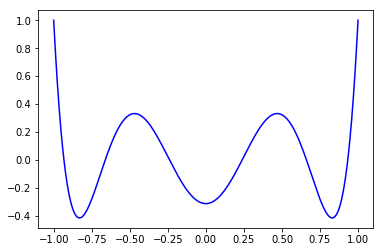

In [35]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x = np.linspace(low, high,1000)
    x_temp = pd.DataFrame()
    
    for i in range(0,degree+1):
        x_temp = pd.concat([x_temp, pd.DataFrame(x)**i], axis=1, ignore_index=True)    
    y = w.dot(x_temp.T)
    plt.plot(x,y,color = 'blue')

## TEST CASES (The following lines should plot a function)
# visualize_function(3, -1, 1)
# visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [36]:
from sklearn.model_selection import train_test_split
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    total_n = n_train + n_test
    w = get_coefficients(degree)
    x = np.linspace(-1, 1,total_n)
    x_temp = pd.DataFrame()
    
    for i in range(0,degree+1):
        x_temp = pd.concat([x_temp, pd.DataFrame(x)**i], axis=1, ignore_index=True)    
    y = np.dot(w,x_temp.T) + np.random.normal(0,sigma,x.size)
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=n_test/total_n, random_state=42)
    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance.
 - Give a detailed explanation of why this happens.
 
 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

In [37]:
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)

Text(0,0.5,'Y')

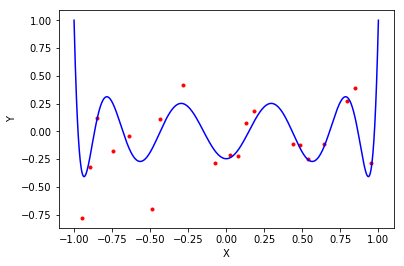

In [20]:
plt.plot(X_train,y_train,'r.')
visualize_function(10, -1, 1)
plt.xlabel("X")
plt.ylabel("Y")

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [22]:
def compute_error(degree,X_train, y_train, X_test, y_test):
    result = pd.DataFrame()
    #Create an instance of Linear Regression Class
    linear = LinearRegression()
    poly = PolynomialFeatures(degree) #defining degree 2

    X_train_ = poly.fit_transform(X_train.reshape(-1, 1)) #Transform to generate said number of polynomials
    X_test_ = poly.fit_transform(X_test.reshape(-1, 1))

    linear.fit(X_train_,y_train) #Fit train data
    y_train_pred = linear.predict(X_train_)

    #Train error & Accuracy
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
#     train_accuracy = linear.score(X_train_,y_train)

    #Test error & Accuracy
    y_test_pred = linear.predict(X_test_)
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    # test_accuracy = linear.score(X_test_,y_test)
    result = result.append({'Degree':degree,'Train Error': train_error, #'Train Accuracy': train_accuracy, \
                        'Test Error' : test_error#, 'Test Accuracy': test_accuracy
                           }, ignore_index=True)
    return result

In [41]:
final_df = pd.DataFrame()
for i in [2,10]:
    final_df = final_df.append(compute_error(i,X_train, y_train, X_test, y_test))
final_df

,Degree,Test Error,Train Error
0,2.0,0.456671,0.252607
0,10.0,0.422121,0.133949


#### Unwarranted increase in the number of polynomials, leads to overfitting.

The results are as expected. Having more complexity/polynomials in the model leads to overfitting.
As shown below, with the increase in the number of polynomials, the train error improves while the test error deteriorates. This shows that the model can explain the train data really well, while fails to generalize on unseen data.

Attaching this image due to randomness in data
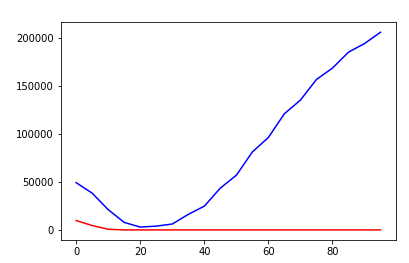

As can be seen here, 20 polynomials would have been a good stopping point

In [42]:
#Generating error values for a range of polynomials
final_df = pd.DataFrame()
for i in range(0,100,5):
    final_df = final_df.append(compute_error(i,X_train, y_train, X_test, y_test))

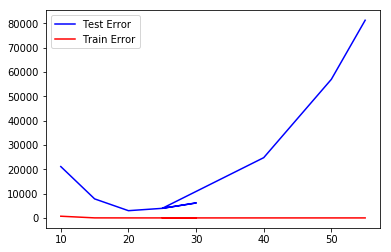

In [50]:
plt.plot(final_df['Degree'],final_df['Test Error'],color = 'blue',label = 'Test Error')
plt.plot(final_df['Degree'],final_df['Train Error'],color = 'red',label = 'Train Error')
plt.legend(loc="upper left")

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

In [44]:
X_train, y_train, X_test, y_test = generate_dataset(45,20,20,0)
#Standard Deviation of 0 -> No noise added

Text(0,0.5,'Y')

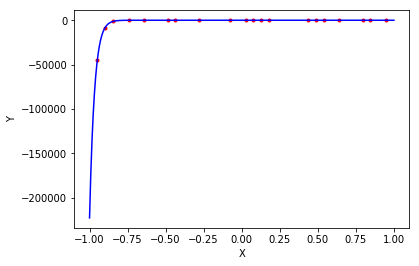

In [26]:
plt.plot(X_train,y_train,'r.')
visualize_function(45, -1, 1)
plt.xlabel("X")
plt.ylabel("Y")

In [45]:
final_df = pd.DataFrame()
for i in [2,10]:
    final_df = final_df.append(compute_error(i,X_train, y_train, X_test, y_test))
final_df

,Degree,Test Error,Train Error
0,2.0,46158.754963,7874.508928
0,10.0,21124.182559,699.503912


In [47]:
final_df = pd.DataFrame()
for i in [10,15,20,25,30,25,40,50,55]:
    final_df = final_df.append(compute_error(i,X_train, y_train, X_test, y_test))
final_df

,Degree,Test Error,Train Error
0,10.0,21124.182559,6.995039e+02
0,15.0,7829.445735,1.551718e+01
0,20.0,2977.649178,8.808680e-10
0,25.0,3937.530672,4.402315e-11
0,30.0,6154.670187,3.807339e-11
0,25.0,3937.530672,4.402315e-11
0,40.0,24779.405090,2.056452e-11
0,50.0,56999.524393,2.646308e-11
0,55.0,81304.061728,3.254715e-11


#### Question 3 - 

It can be observed from the above table that, given no noise in the data and was generated from a 45degree polynomial, it is evident that model with a polynomial closer to 45 would perform better, than a model far away from 45.

This however again changes when the number of polynomials exceeds 45. This is when the model starts to overfit the data